# Лабораторна робота №3

# Варіант 4

## Завдання №1 

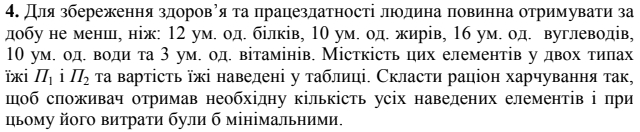

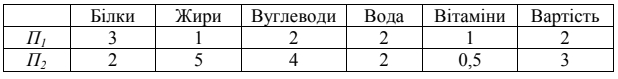

Математична модель задачі:
$$ Функція мети: \\ F(x) = 2x_1 + 3x_2 \rightarrow \ min \\ Обмеження: \\ \left\{ \begin{array}\\ 3x_1 + 2x_2 & \leqslant \ 12 \\ x_1 + 5x_2 & \leqslant \ 10 \\ 2x_1 + 4x_2 & \leqslant \ 16 \\ 2x_1 + 2x_2 & \leqslant \ 10 \\ x_1 + 0.5x_2 & \leqslant \ 3  \ \end{array} \right. $$

### Код завдання:

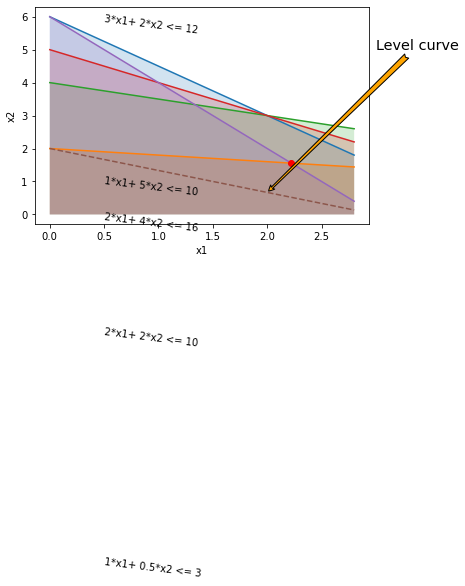

Solve with scipy.optimize:
Time cost: 0.003 sec.
B1 = 2.2222
B2 = 1.5556
F(x)max = 9.1111
     con: array([], dtype=float64)
     fun: -9.111111104076798
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.22222223e+00, 1.29876163e-08, 5.33333334e+00, 2.44444445e+00,
       8.11311462e-10])
  status: 0
 success: True
       x: array([2.22222222, 1.55555555])
Solve with pulp.LpProblem:
Time cost: 0.048 sec.
B1 = 3.0769
B2 = 1.3846
F(x)max = 10.3077
allClose: False


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import pulp
import time

c = [-2, -3]
A = [[3, 2], [1, 5], [2, 4], [2, 2], [1, 0.5]]
b = [12, 10, 16, 10, 3]

x0_bounds = (0, None)
x1_bounds = (0, None)
startTime = time.time()
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
stopTime = time.time()

def f(b, a1, a2, x):
    y = np.array([])
    for xIter in x:
        yIter = (b-a1*xIter)/a2
        y = np.append(y, yIter)
    return y

x = np.arange(0, 3, 0.2)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.2)
    plt.text(0.5, f(b=b[i], a1=A[i][0], x=[i+1,], a2=A[i][1])-2*i+1, 
             '{a1}*x1+ {a2}*x2 <= {b}'.format(a1=A[i][0], a2=A[i][1], b=b[i]), 
             rotation=-7%360)
plt.plot(x, (c[0]*c[1]-np.abs(c[0])*x)/np.abs(c[1]), '--')
plt.plot(res.x[0], res.x[1], 'ro')
plt.annotate('Level curve', 
             xy=(2, (c[0]*c[1]-np.abs(c[0])*2)/np.abs(c[1])), 
             xytext=(3, (c[0]*c[1]-np.abs(c[0])*3)/np.abs(c[1])+5), 
             size='x-large', arrowprops=dict(facecolor='orange', arrowstyle='fancy'))

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
print('Solve with scipy.optimize:')
print('Time cost: {0:.3f} sec.'.format(stopTime-startTime))
for i, variable in enumerate(res.x):
    print("B{} = {:.4f}".format(i+1, variable))
print("F(x)max = {:.4f}".format(-res.fun))
print(res)
print('Solve with pulp.LpProblem:')
my_lp_problem = pulp.LpProblem("First_task", pulp.LpMaximize)
b1 = pulp.LpVariable('B1', lowBound=0, cat='Continuous')
b2 = pulp.LpVariable('B2', lowBound=0, cat='Continuous')

my_lp_problem += 2 * b1 + 3 * b2, "Z"

my_lp_problem += 3*b1 + 2*b2 <= 12
my_lp_problem += 1*b1 + 5*b2 <= 10
my_lp_problem += 2*b1 + 4*b2 <= 16
my_lp_problem += 2*b1 + 2*b2 <= 10
my_lp_problem += 1*b1 + 0.5*b2 <= 13

start = time.time()
my_lp_problem.solve()
print('Time cost: {0:.3f} sec.'.format(time.time()-start))
pulp.LpStatus[my_lp_problem.status]
for variable in my_lp_problem.variables():
    print("{} = {:.4f}".format(variable.name, variable.varValue))
print("F(x)max = {:.4f}".format(pulp.value(my_lp_problem.objective)))
print('allClose:', np.allclose(float(pulp.value(my_lp_problem.objective)), float(-res.fun)))

## Завдання №2

Транспортна задача: задано 4 постачальники і 5 замовників для перевезення
однорідного вантажу. Кожен i-й постачальник має аі (і=1, 2, ... , m) одиниць
вантажу, а кожному j-му замовнику потрібно доставити bj (j=1, 2, ..., n)
одиниць вантажу. Задані тарифи (вартості) cij перевезення одиниці вантажу
від будь-якого і-го постачальника до будь-якого j-го замовника.
Транспортному підприємству, яке виконує перевезення вантажів, необхідно
визначити скільки одиниць вантажу xij потрібно перевезти від кожного і-го
постачальника до кожного j-го замовника щоб здійснити перевезення усіх
вантажів з мінімально-можливою загальною вартістю усіх перевезень

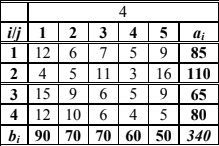

Математична модель задачі:
$$ Функція мети: \\ F(x) = 16x_{11} + 4x_{12} + 7x_{13} + 10x_{14} + 15x_{15} + 4x_{21} + 5x_{22} + 11x_{23} + 3x_{24} + 10x_{25} + 15x_{31} + 12x_{32} + 6x_{33} + 5x_{34} + 9x_{35} + 10x_{41} + 8x_{42} + 12x_{43} + 4x_{44} + 5x_{45} \rightarrow \ min \\ Обмеження: \\ \left\{ \begin{array}\\ 16x_{11} + 4x_{12} + 7x_{13} + 10x_{14} + 15x_{15} = 85 \\ 4x_{21} + 5x_{22} + 11x_{23} + 3x_{24} + 10x_{25} = 110 \\ 15x_{31} + 12x_{32} + 6x_{33} + 5x_{34} + 9x_{35} = 65 \\ 10x_{41} + 8x_{42} + 12x_{43} + 4x_{44} + 5x_{45} = 80 \\ 16x_{11} + 4x_{21} + 15x_{31} + 10x_{41} = 90 \\ 4x_{12} + 5x_{22} + 12x_{32} + 8x_{42} = 70 \\ 7x_{13} + 11x_{23} + 6x_{33} + 12x_{43} = 70 \\ 10x_{14} + 3x_{24} + 5x_{34} + 4x_{44} = 60 \\ 15x_{15} + 10x_{25} + 9x_{35} + 5x_{45} = 50 \\ x_{ij} \geqslant 0, & i,j \geqslant 0 \ \end{array} \right. $$

### Код завдання:

In [22]:
startTime = time.time()
c = [12, 6, 7, 5, 9, 4, 5, 11, 3, 16, 15, 9, 6, 5, 9, 12, 10, 6, 4, 5]
A = [[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
     [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
     [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
     [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]] 
b = [85, 110, 65, 80, 90, 70, 70, 60, 50] 
res = linprog(c, A_eq=A, b_eq=b)
stopTime = time.time()
print('Solve with scipy.optimize:')
print('Time cost: {0:.3f} sec.'.format(stopTime-startTime))
for i, variable in enumerate(res.x):
    print("x{},{} = {:.4f}".format((i)//5+1, (i)%5+1, variable))

result = np.array(res.x).reshape((4, 5))
print("F(x)min = {:.4f}".format(res.fun))

Solve with scipy.optimize:
Time cost: 0.006 sec.
x1,1 = 0.0000
x1,2 = 70.0000
x1,3 = 3.4970
x1,4 = 11.5030
x1,5 = 0.0000
x2,1 = 90.0000
x2,2 = 0.0000
x2,3 = 0.0000
x2,4 = 20.0000
x2,5 = 0.0000
x3,1 = 0.0000
x3,2 = 0.0000
x3,3 = 65.0000
x3,4 = 0.0000
x3,5 = 0.0000
x4,1 = 0.0000
x4,2 = 0.0000
x4,3 = 1.5030
x4,4 = 28.4970
x4,5 = 50.0000
F(x)min = 1685.0000


<ipython-input-22-75baaec8bf4a>:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A, b_eq=b)


In [23]:
import pandas as pd
print('C - Customer, S - Supplier')
df = pd.DataFrame(data=result, index=["S 1", "S 2", "S 3", "S 4"], 
                  columns=["C 1", "C 2", "C 3", "C 4", "C 5"])
df

C - Customer, S - Supplier


,C 1,C 2,C 3,C 4,C 5
S 1,8.263776e-10,7.000000e+01,3.496961e+00,1.150304e+01,1.208037e-09
S 2,9.000000e+01,8.820969e-10,1.031888e-09,2.000000e+01,4.284457e-10
S 3,4.691126e-10,1.836795e-09,6.500000e+01,3.586532e-09,9.906348e-10
S 4,6.916495e-10,7.745986e-10,1.503039e+00,2.849696e+01,5.000000e+01
